# Parse CSE File to Get Course List

In [ ]:
import PyPDF2
import pandas as pd

course_type = 'CSE'
pdfFileObj = open('ComputingScienceSummaries.pdf', 'rb')
pdfReader = PyPDF2.PdfReader(pdfFileObj)
  
n_pages = len(pdfReader.pages)
text = ''

for n in range(n_pages):
    pageObj = pdfReader.pages[n]
    text += pageObj.extract_text()

pdfFileObj.close()

courses = {}
use_next_line = False

for i, line in enumerate(text.splitlines()):
    if line.strip().startswith(course_type) and line[9] == ' ':
        course = line.replace('  ', ' ').strip()
    if '©' in line and course_type in line:
        # 100 © Alberta Education, Alberta, Canada   Revised 2010  CSE2910:  CSE PROJECT B  
        course = course_type + line.split(course_type)[1]
        course = course.replace('  ', ' ').strip()
    if 'Prerequ' in line:
        preq = line.split(': ')[1].strip().replace(' ', '')
        if 'None' in preq:
            preq = ''
        courses[course] = [preq]
    if use_next_line:
        #print('True', line)
        preq2 = line.split(': ')[0].strip().replace(' ', '')
        if len(preq2) != 0: # in case there is no prereq on this line
            preq = preq + ',' + preq2
        courses[course] = [preq]
        use_next_line = False
    if 'Prerequisites' in line:
        #print('use next line', line)
        #print(i, course, preq, '---', line)
        use_next_line = True
    #if '1120' in line:
    #if '1010' in line:
    #    print(i, use_next_line, line)
df = pd.DataFrame.from_dict(courses, orient='index', columns=['Prerequisites']).reset_index()
df.columns = ['Course', 'Prerequisites']
df

In [ ]:
for i, line in enumerate(text.splitlines()):
    if '©' in line:
        print(i, line)

In [ ]:
df[df['Prerequisites'].str.contains(course_type)]

In [ ]:
df[df['Course'].str[3]=='3']

In [ ]:
df.to_csv(course_type+'.csv', index=False)

## Import from CSE.csv file

In [19]:
import pandas as pd
df = pd.read_csv('CSE.csv')
df.sort_values('Course', ascending=False)

,Course,Prerequisites
31,CSE3950: CSE ADVANCED PRACTICUM,NaN
30,CSE3920: CSE PROJECT E,NaN
29,CSE3910: CSE PROJECT D,NaN
28,CSE3340: DYNAMIC DATA STRUCTURES 3,CSE3330
27,CSE3330: DYNAMIC DATA STRUCTURES 2,CSE3320
26,CSE3320: DYNAMIC DATA STRUCTURES 1,CSE3310
25,CSE3310: RECURSIVE ALGORITHMS 1,"CSE3110,CSE3120"
24,CSE3240: ROBOTICS PROGRAMMING 3,"CSE2240,CSE2110"
23,CSE3210: SERVER -SIDE SCRIPTING 1,"CSE2210,CSE2110"
22,CSE3140: SECOND LANGUAGE PROGRAMM ING 2,CSE2120


In [3]:
# add graphviz to path
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

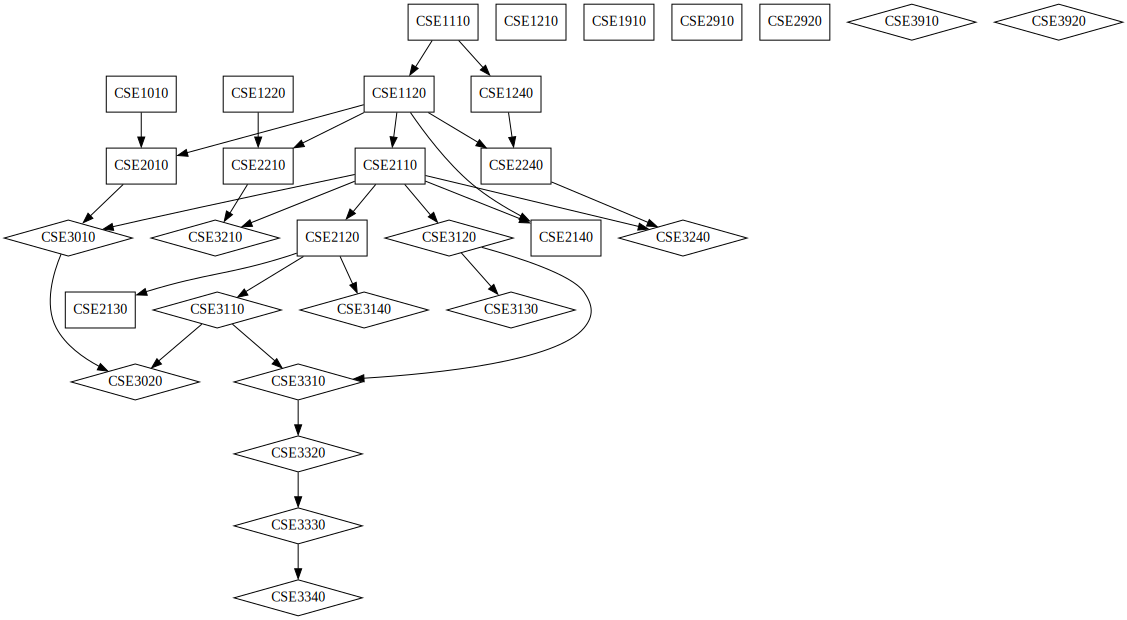

In [21]:
import graphviz

dot = graphviz.Digraph(format='png') # or 'pdf' or 'svg'

for row in df.itertuples():
    course_number = row.Course.split(':')[0]#[3:]
    if '950' not in course_number:
        if course_number[3] == '3':
            dot.node(course_number, shape='diamond')
        else:
            dot.node(course_number, shape='box')
        try:
            if len(row.Prerequisites) > 3:
                for preq in row.Prerequisites.split(','):
                    preq_number = preq#[3:]
                    dot.edge(preq_number, course_number)
        except:
            pass
dot

In [13]:
# render the graph as a png
dot.render('CSE')


'CSE.png'

In [ ]:
# save the output to a file
#dot.render(course_type, view=True)
#import os
# delete file
#os.remove(course_type)

# NET Courses

In [ ]:
import PyPDF2
import pandas as pd

course_type = 'NET'
pdfFileObj = open('NetworkingSummary.pdf', 'rb')

pdfReader = PyPDF2.PdfReader(pdfFileObj)
n_pages = len(pdfReader.pages)
text = ''
for n in range(n_pages):
    pageObj = pdfReader.pages[n]
    text += pageObj.extract_text()
pdfFileObj.close()

courses = {}
use_next_line = False

for i, line in enumerate(text.splitlines()):
    if line.strip().startswith(course_type):# and line[9] == ' ':
        course = line.replace('  ', ' ').strip()
        use_next_line = False
    if '©' in line and course_type in line and ':' in line:
        course = line.split(':')[0].strip().split(' ')[-1] + ':' + line.split(':')[1].strip()
        use_next_line = False
    if 'Prerequ' in line:
        try:
            preq = line.split(':')[1].strip().replace(' ', '')
        except:
            preq = ''
        if 'None' in preq:
            preq = ''
        courses[course] = [preq]
    if use_next_line:
        preq2 = line.split(': ')[0].strip().replace(' ', '')
        if len(preq2) != 0: # in case there is no prereq on this line
            preq = preq + ',' + preq2
        courses[course] = [preq]
    if 'Prerequisites' in line:
        use_next_line = True
df = pd.DataFrame.from_dict(courses, orient='index', columns=['Prerequisites']).reset_index()
df.columns = ['Course', 'Prerequisites']
df

In [ ]:
df['Prerequisites'] = df['Prerequisites'].str.replace('NET2030','NET2030,NET2040,NET2050,NET2060,NET2070')

In [ ]:
df[df['Prerequisites'].str.contains(course_type)]

In [ ]:
df.to_csv(course_type+'.csv', index=False)

In [ ]:
import graphviz
dot = graphviz.Digraph()

for row in df.itertuples():
    course_number = row.Course.split(':')[0]
    if '950' not in course_number:
        if course_number[3] == '3':
            dot.node(course_number, shape='diamond')
        else:
            dot.node(course_number, shape='box')
        if row.Prerequisites != '':
            for preq in row.Prerequisites.split(','):
                dot.edge(preq, course_number)

dot

In [ ]:
# save the output to a file
dot.render(course_type, view=True)
import os
# delete file
os.remove(course_type)

# ELT Courses

In [ ]:
import PyPDF2
import pandas as pd

course_type = 'ELT'
pdfFileObj = open('ElectroTechnologiesSummaries.pdf', 'rb')

pdfReader = PyPDF2.PdfReader(pdfFileObj)
n_pages = len(pdfReader.pages)
text = ''
for n in range(n_pages):
    pageObj = pdfReader.pages[n]
    text += pageObj.extract_text()
pdfFileObj.close()

courses = {}
use_next_line = False

for i, line in enumerate(text.splitlines()):
    if line.strip().startswith(course_type):# and line[9] == ' ':
        course = line.replace('  ', ' ').strip()
        use_next_line = False
    if '©' in line and course_type in line and ':' in line:
        course = line.split(':')[0].strip().split(' ')[-1] + ':' + line.split(':')[1].strip()
        use_next_line = False
    if 'Prerequ' in line:
        try:
            preq = line.split(':')[1].strip().replace(' ', '')
        except:
            preq = ''
        if 'None' in preq:
            preq = ''
        courses[course] = [preq]
    if use_next_line:
        preq2 = line.split(': ')[0].strip().replace(' ', '')
        if len(preq2) != 0: # in case there is no prereq on this line
            preq = preq + ',' + preq2
        courses[course] = [preq]
    if 'Prerequisites' in line:
        use_next_line = True
df = pd.DataFrame.from_dict(courses, orient='index', columns=['Prerequisites']).reset_index()
df.columns = ['Course', 'Prerequisites']
df

In [ ]:
df.to_csv(course_type+'.csv', index=False)

In [ ]:
recommended = ['1010','1130','1140','2010','2140','2160','2240','2170','3170','3150','3180','3190','3200']

import graphviz
dot = graphviz.Digraph()

for row in df.itertuples():
    course_number = row.Course.split(':')[0]
    if '950' not in course_number:
        if course_number[3:] in recommended:
            color = 'red'
        else:
            color = 'black'
        if course_number[3] == '3':
            d = dot.node(course_number, shape='diamond',color=color)
            #d.attr('node', color='blue')
        else:
            d = dot.node(course_number, shape='box',color=color)
        
        if row.Prerequisites != '':
            for preq in row.Prerequisites.split(','):
                dot.edge(preq, course_number)

dot

In [ ]:
# save the output to a file
dot.render(course_type, view=True)
import os
# delete file
os.remove(course_type)

# Combining All Together

In [ ]:
import pandas as pd

c = pd.read_csv('CSE.csv').fillna('')
n = pd.read_csv('NET.csv').fillna('')

e = pd.read_csv('ELT.csv').fillna('')
# removed unused ELT courses
recommended = ['1010','1130','1140','2010','2140','2160','2240','2170','3170','3150','3180','3190','3200']
elt = ['ELT' + x for x in recommended]
e = e[e['Course'].str[:7].isin(elt)]

design_courses = {'DES1020: THE DESIGN PROCESS':'','DES1040: 3-D DESIGN 1':'DES1020'}
d = pd.DataFrame.from_dict(design_courses, orient='index', columns=['Prerequisites']).reset_index()
d.columns = ['Course', 'Prerequisites']

df = pd.concat([c,e,n,d])
df.reset_index(drop=True, inplace=True)

# split column to course code and course name
df['Course Number'] = df['Course'].str.split(':').str[0].str.strip()
df['Course Name'] = df['Course'].str.split(':').str[1].str.strip()
df

In [ ]:
#completed = ['CSE1010']
completed = []

import graphviz
dot = graphviz.Graph()

for row in df.itertuples():
    course_number = row._3
    if '950' not in course_number:
        if course_number in completed:
            color = 'red'
        else:
            color = 'black'
        if course_number[3] == '3':
            d = dot.node(course_number, shape='diamond',color=color)
            #d.attr('node', color='blue')
        else:
            d = dot.node(course_number, shape='box',color=color)
        
        if row.Prerequisites != '':
            for preq in row.Prerequisites.split(','):
                dot.edge(preq, course_number)

#dot.attr('graph', ratio='compress')
#dot.attr('graph', ratio='0.5')
#dot.attr('graph', size='80,80')
#dot.attr('graph', ratio='1.5')
#dot.attr('graph', layout='neato', defaultdist='2.0', overlap='false', splines='true', sep='+2.0', nodesep='0.5', ranksep='0.5', concentrate='true', size='8,8', ratio='0.5', orientation='landscape')
dot.attr('graph', layout='neato', pack='false', defaultdist='800')
#dot.attr('graph', orientation='landscape')
dot

In [ ]:
# a function that counts how many instances of each value are in a list
def countValues(my_list):
    for x in my_list:
        